## The Naive Bayes

The NB method has remained popular over the years due to its ability to handle high dimensions in the feature space. Assumes that given a class G = j, the features $X_k$ are indepdendent. $$f_j(X) = \prod_{k=1}^{p}f_{jk}(X_k)$$

Where $f_{jk}$ is the joint class conditional marginal densities. See Examples on wiki page: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In sklearn, we have GaussianNB, BernoilliNB, and MultinomialNB. GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data, and Multi assumes count.

The Naive Bayes are fast to train and predict, and work well in high dimensional space. NB works particularly well on large datasets.


In [4]:
import pandas as pd
import numpy as np 
X = np.array([[0, 1, 0, 1],
[1, 0, 1, 1],
[0, 0, 0, 1],
[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
    print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2])}
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


## Decision Trees

Widely used for classification and regression tasks, essentially they learn a hiearchy of if/else questions, leading to a decision.

Essentially each question splits the dataset into two parts starting with the full dataset at the root. It is easy to overfit a decision tree by continuing to split until all the nodes (end points) are pure (contain only one  type). To fight overfitting we can stop the tree early (pre-pruning), or build the tree fully and remove/combines nodes that contain fairly little distinguishing info.

Criteria for pre-pruning, include limited the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it. 

In [9]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


The training accuracy is 100% because all the leaves are pure. To pre-pune we do the following:


In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

In [21]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#NEED TO FIX THIS - NEED TO BE ABLE TO SHOW DECISION TREE GRAPHS
    

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Instead of looking at the decision tree, we can see how  important each feature is.

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


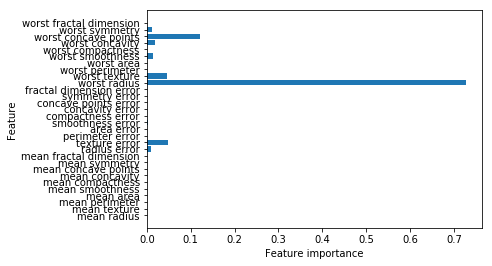

In [24]:
import matplotlib.pyplot as plt
print("Feature importances:\n{}".format(tree.feature_importances_))
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

## Decision Tree Regressors

Note DT Regressors can not make predictions out side of the range of training data (it can not extrapolate).

#### Strengths and Weaknesses

Parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. The resulting models are easily visualized, and the algorithms are invariant to the scaling of the data. The features dont need to be normalized so trees work well when you have features that are on completely different scales, or a mix of binary and continious features.

The downside it is easy to overfit, and there is poor generalization. 

# Ensemble Methods
## Ensemble of Decision Trees - Random Forests

DTs tend to overfit. To overcome this, use a collection of DTs that may overfit due to different reasons, and the result is a model that has less overfitting, but maintains predictive power. 

There are two ways to randomize the underlying decision trees, either by using the input data, or by selecting the features.

1. Select number of Trees 
2. Bootstrap sample - by drawing n_samples repeatedly, end up with datasets that are the same size as the original, but may repeat certain data points.
3. Algo builds individual trees, using randomly selected subset of features - this can be controlled by max_features
4. For prediction: Classification - uses voting system to see most voted, Regression - uses average

Specifically, when prediciting using the classification case a probability is provided for each label by each tree, then this probability is averaged.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [26]:
X,y = make_moons(n_samples = 100, noise  = 0.25, random_state = 3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

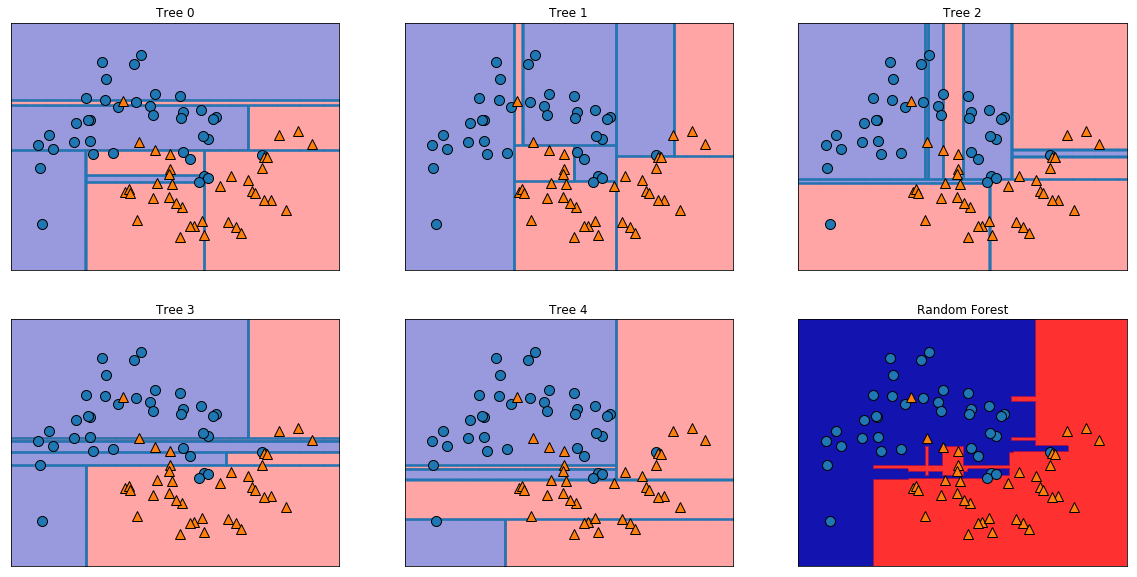

In [28]:
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
    alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


### Strengths Weaknesses 

Random forests for regression and classification are widely used, very powerful, and work well without too much tuning of parameters. Also the data does not need to be scaled. Building Random forests can be time consuming but can be parallelized. 

Random forests tend not to perform very well on high dimensional, sparse data, such as text. 

## Gradient Boosted Regression Trees

Another ensemble method that combines multiple decision trees to create a more powerful model. Gradient boosting works by building trees in a serial manner, each tree tries to minimize error from the previous one. 

Using very shallow trees (depth of 1 -5) and add them iteratively.  This is also a form of an additive model

<img src = ./images/decisions/additive1.png/>

This method is more sensitive to tuning, and an important parameter is the **learning rate** which controls how strongly each tree tries to correct the mistakes of the previous trees.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [31]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) #adjusting for overfitting
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


### Strengths and Weaknesses

Gradient boosted decision trees are very powerful and widely used models for supervised learning. Main drawback is that they require tuning, and can take a long time to train. Similiarly to tree models, they do not perform well on high-dimension, but sparse data. 

